In [1]:
## Perspective Transformation

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
image = cv2.imread('./girraffe.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

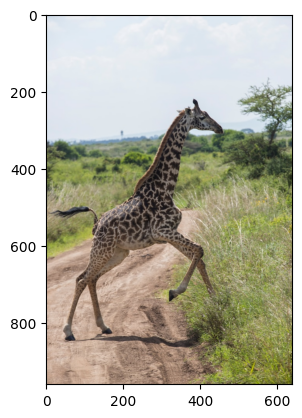

In [5]:
plt.imshow(image_rgb)

In [6]:
rows, cols, _ = image_rgb.shape
input_points = np.float32([[50,50],[cols - 50, 50], [50, rows-50],[cols-50, rows-50]])
output_points = np.float32([[10,100],[cols - 100, 50], [100, rows-10],[cols-50, rows-100]])

''' 
Transformation matrix for perspective transformation

3*3

a,b,c
d,e,f
g,h,i

a,b,c is responsible for horizontal scaling, rotation and translation
d,e,f is resposible for vertical scaling, rotation and translation
g,h are Perspective components that account for depth and skew

'''
M = cv2.getPerspectiveTransform(input_points, output_points)
print(M)

[[ 1.04951705e+00  1.14575212e-01 -4.81061040e+01]
 [-8.81003572e-02  1.08259329e+00  5.12604463e+01]
 [ 1.08087165e-04  8.89313803e-05  1.00000000e+00]]


(np.float64(-0.5), np.float64(639.5), np.float64(959.5), np.float64(-0.5))

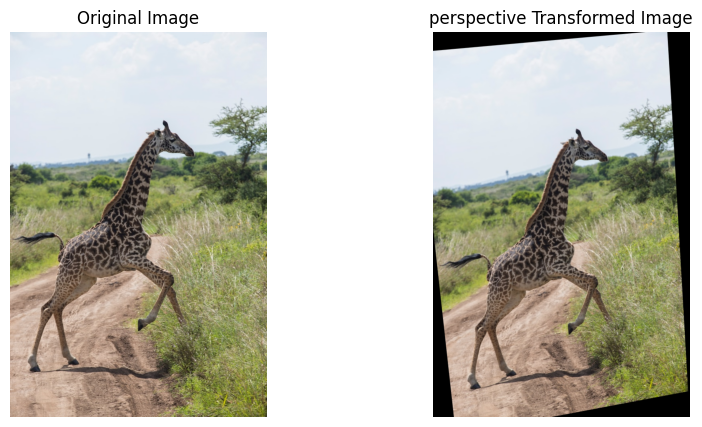

In [7]:
perspective_image = cv2.warpPerspective(image_rgb,M, (cols,rows))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(perspective_image)
plt.title("perspective Transformed Image")
plt.axis("off")

(np.float64(-0.5), np.float64(639.5), np.float64(959.5), np.float64(-0.5))

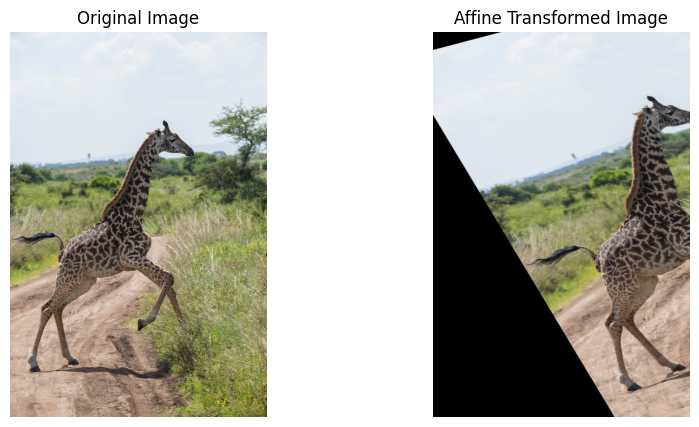

In [8]:
## Affine Transformation 

input_points = np.float32([[50,50],[200,50], [50,200]])
output_points = np.float32([[10,100],[200,50], [100,250]])

m = cv2.getAffineTransform(input_points,output_points)

affine_image = cv2.warpAffine(image_rgb, m, (cols, rows))


plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(affine_image)
plt.title("Affine Transformed Image")
plt.axis("off")

(np.float64(-0.5), np.float64(639.5), np.float64(959.5), np.float64(-0.5))

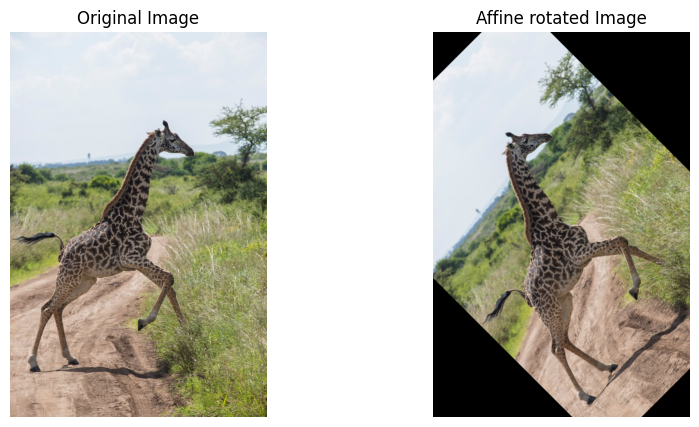

In [9]:
## Rotation 

angle = 45
center = (cols // 2, rows//2)
scale  = 1.0
m=cv2.getRotationMatrix2D(center,angle, scale)

rotated_image = cv2.warpAffine(image_rgb,m,(cols,rows))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(rotated_image)
plt.title("Affine rotated Image")
plt.axis("off")

(np.float64(-0.5), np.float64(1119.5), np.float64(959.5), np.float64(-0.5))

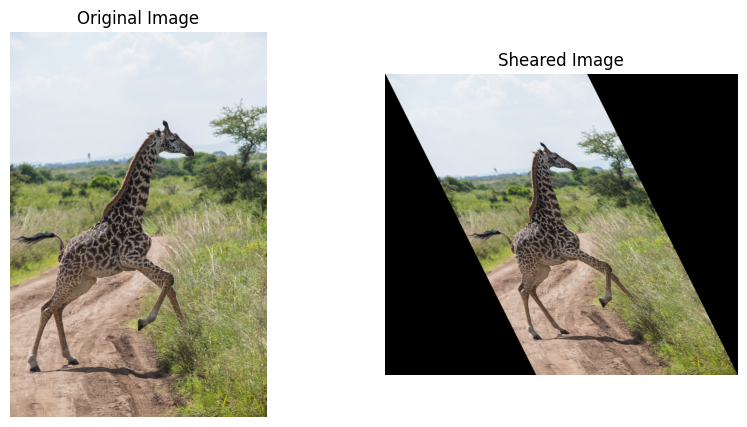

In [11]:
## Rotation 

angle = 45
center = (cols // 2, rows//2)
scale  = 1.0

shear_x, shear_y = 0.5, 0

m = np.float32([[1, shear_x,0],
           [shear_y,1,0]])


sheared_image = cv2.warpAffine(image_rgb,m,(cols + int(shear_x * rows),rows))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(sheared_image)
plt.title("Sheared Image")
plt.axis("off")

(np.float64(-0.5), np.float64(639.5), np.float64(959.5), np.float64(-0.5))

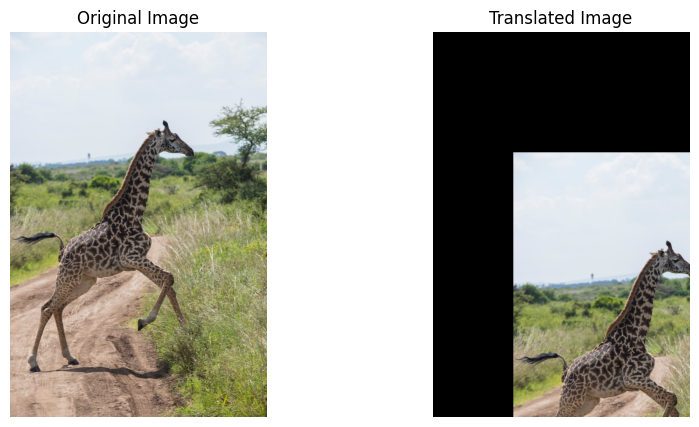

In [12]:
## TRANSLATION 

## Rotation 

# angle = 45
# center = (cols // 2, rows//2)
# scale  = 1.0

tx, ty = 200, 300

m = np.float32([[1, 0, tx],
           [0,1,ty]])


translated_image = cv2.warpAffine(image_rgb,m,(cols,rows))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(translated_image)
plt.title("Translated Image")
plt.axis("off")